<a href="https://colab.research.google.com/github/sanaelk/Springboard/blob/main/API_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
#Step 1: Set up Parameters

#Location coordinates for London
latitude = 51.5074
longtitude = -0.1278

#Date range
start_date = '2022-01-01'
end_date = '2022-12-31' # One year of data

#Variables to fetch
hourly_variables = ['precipitation']

In [58]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longtitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)

In [59]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [60]:
#Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [61]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()

,0
precipitation,0


In [62]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill

/tmp/ipython-input-2589408753.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [63]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,precipitation
count,8760.000000
mean,0.075662
std,0.404500
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


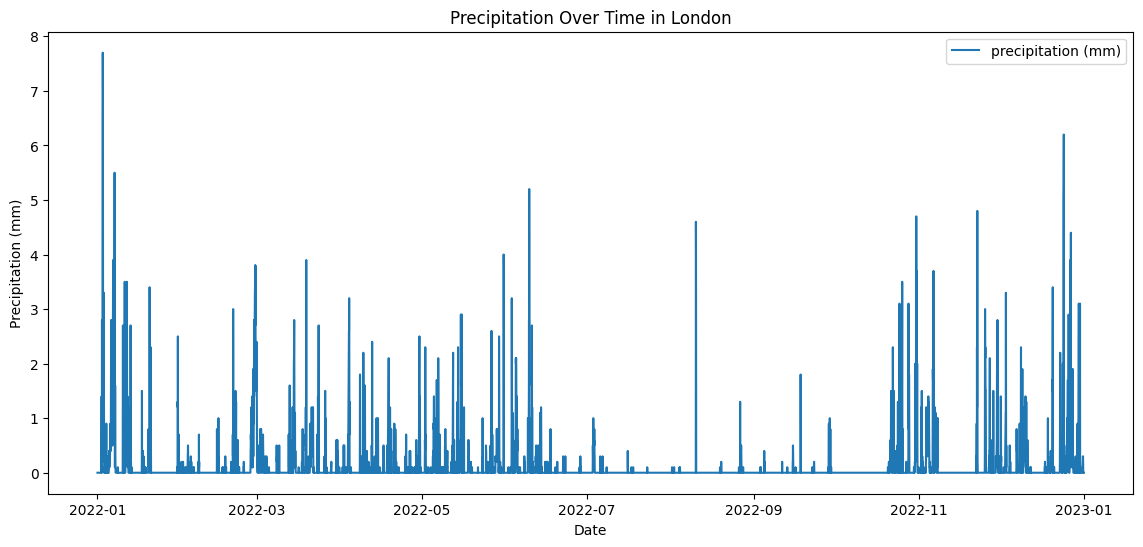

In [64]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_sea.index, df_sea['precipitation'], label='precipitation (mm)')
plt.title('Precipitation Over Time in London')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [65]:
#Location coordinates for Seattle
latitude = 47.6062
longtitude = -122.3321

#Date range
start_date = '2022-01-01'
end_date = '2022-12-31' # One year of data

#Variables to fetch
hourly_variables = ['precipitation']

In [66]:
# Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longtitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response = requests.get(base_url, params=params)

In [67]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [68]:
 #Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df_sea= pd.DataFrame(hourly_data)
df_sea.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [69]:
#  Data Cleaning

# Convert 'time' column to datetime
df_sea['time'] = pd.to_datetime(df_sea['time'])

# Set 'time' as the index
df_sea.set_index('time', inplace=True)

# Check for missing values
df_sea.isnull().sum()

,0
precipitation,0


In [70]:
# Handle missing values (if any)
df_sea.fillna(method='ffill', inplace=True)  # Forward fill

/tmp/ipython-input-154520205.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea.fillna(method='ffill', inplace=True)  # Forward fill


In [71]:
 #Exploratory Data Analysis

# Summary Statistics
df_sea.describe()

,precipitation
count,8760.000000
mean,0.129132
std,0.463708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.700000


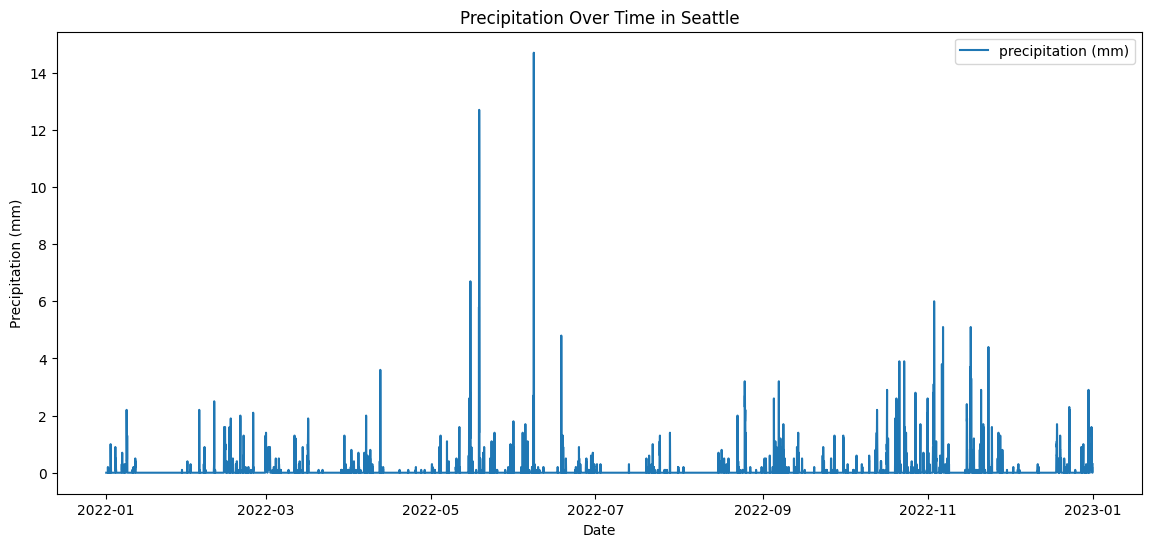

In [72]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_sea.index, df['precipitation'], label='precipitation (mm)')
plt.title('Precipitation Over Time in Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [73]:
weekly_london = df['precipitation'].resample('W').sum()
weekly_seattle = df_sea['precipitation'].resample('W').sum()

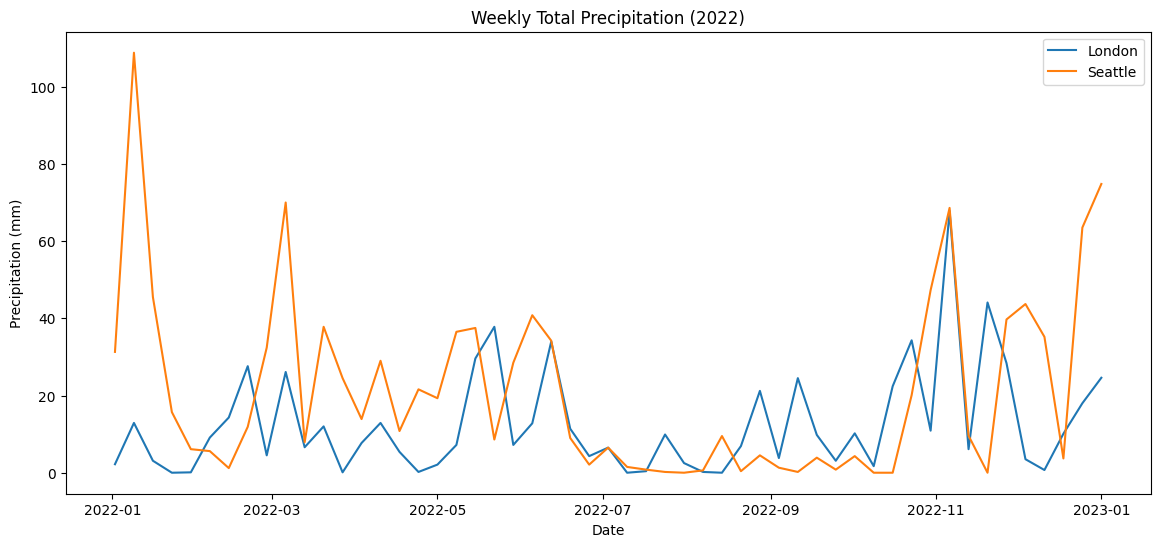

In [74]:

plt.figure(figsize=(14,6))
plt.plot(weekly_london.index, weekly_london, label='London')
plt.plot(weekly_seattle.index, weekly_seattle, label='Seattle')
plt.title('Weekly Total Precipitation (2022)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [75]:
print("Total London precipitation (mm):", weekly_london.sum())
print("Total Seattle precipitation (mm):", weekly_seattle.sum())

Total London precipitation (mm): 662.8000000000001
Total Seattle precipitation (mm): 1131.2
